In [108]:
# Parameters
day_obs = '2024-06-26'
instrument = 'latiss'

In [109]:
import os
from lsst.summit.utils import ConsDbClient
import requests
import pandas as pd
import matplotlib.pylab as plt

from IPython.display import display, Markdown, display_markdown
URL = "http://consdb-pq.consdb:8080/consdb" # Don't use this one
os.environ["no_proxy"] += ",.consdb"
%matplotlib inline
day_obs_int = int(day_obs.replace('-', ''))


In [110]:
from lsst.summit.utils import ConsDbClient
client = ConsDbClient(URL)
display_markdown('### Consolidated Database is accessible',raw=True)

### Consolidated Database is accessible

In [111]:

psf_query = f'''
    SELECT psf_area FROM cdb_lsstcomcamsim.ccdvisit1_quicklook
    where day_obs = {day_obs_int}
'''

sky_brightness_query = f'''
'''

zero_point_query = f'''
    SELECT zero_point FROM cdb_lsstcomcamsim.ccdvisit1_quicklook
    where day_obs = {day_obs_int}
'''

ra_dec_query = f'''
    SELECT s_ra, s_dec FROM cdb_lsstcomcamsim.ccdvisit1_quicklook
    where day_obs = {day_obs_int}
'''


In [112]:
day_obs_int = int(day_obs.replace('-', ''))
instrument = 'lsstcomcamsim'
ccdvisit1_quicklook = f''' 
    SELECT * FROM cdb_{instrument}.ccdvisit1_quicklook
'''

visit1 = f'''
    SELECT * FROM cdb_{instrument}.visit1
'''

# Join Visit1 and ccdVisit1 to access data and day obs
visits = client.query(visit1).to_pandas()
quicklook = client.query(ccdvisit1_quicklook).to_pandas()

visits = visits.join(quicklook, on='visit_id',lsuffix='',rsuffix='_q')



In [113]:
visits_w_psf = visits[visits['psf_area'].notna()]

visits_w_zero = visits[visits['zero_point'].notna()]


Empty DataFrame
Columns: [visit_id, exposure_name, controller, day_obs, seq_num, physical_filter, band, s_ra, s_dec, sky_rotation, azimuth_start, azimuth_end, azimuth, altitude_start, altitude_end, altitude, zenith_distance_start, zenith_distance_end, zenith_distance, airmass, exp_midpt, exp_midpt_mjd, obs_start, obs_start_mjd, obs_end, obs_end_mjd, exp_time, shut_time, dark_time, group_id, cur_index, max_index, img_type, emulated, science_program, observation_reason, target_name, air_temp, pressure, humidity, wind_speed, wind_dir, dimm_seeing, focus_z, simulated, s_region, ccdvisit_id, s_ra_q, s_dec_q, zenith_distance_q, photometric_calib, psf_sigma, sky_bg, sky_noise, astrom_offset_mean, astrom_offset_std, n_psf_star, psf_star_delta_e1_median, psf_star_delta_e2_median, psf_star_delta_e1_scatter, psf_star_delta_e2_scatter, psf_star_delta_size_median, psf_star_delta_size_scatter, psf_star_scaled_delta_size_scatter, psf_trace_radius_delta, max_dist_to_nearest_psf, zero_point, seeing_zen

In [114]:
# Pare down to only day obs 
visits_today = visits[(visits['day_obs'] == day_obs_int)]# & (visits['psf_area'].notna())]

ra = visits_today['s_ra']
dec = visits_today['s_dec']

ra 3498          None
3499          None
3500          None
3501          None
3502          None
           ...    
4279    280.085844
4280    280.071854
4281    280.241652
4282    279.895233
4283    280.255493
Name: s_ra, Length: 786, dtype: object
dec 3498         None
3499         None
3500         None
3501         None
3502         None
          ...    
4279   -48.042442
4280   -48.109481
4281   -47.902436
4282   -47.971508
4283   -47.911465
Name: s_dec, Length: 786, dtype: object


In [119]:
plt.style.use('seaborn-v0_8-bright')
def plot(y, x):
    # Times Square Tutorial
    #x = np.linspace(0, 10, 100)
    #y = y0 + A * np.sin(2 * np.pi * x / lambd)

    # plot
    fig, ax = plt.subplots()

    ax.scatter(x, y)#, linewidth=2.0, color="#058b8c")

    #ax.set(
    #    xlim=(0, 8), xticks=np.arange(1, 8),
    #    ylim=(0, 8), yticks=np.arange(1, 8)
    #)

    plt.show()

# This plot is only proof that data exists

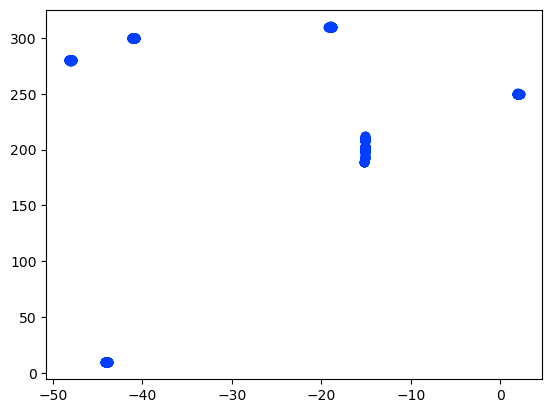

In [123]:
display_markdown('# This plot is only proof that data exists', raw=True)
plot(ra, dec)

In [117]:
#try:
#    psf_data = client.query(psf_query).to_pandas()
#except requests.HTTPError or requests.JSONDecodeError:
#    psf_data = client.query(psf_query).to_pandas()
